### sklearn.linear_model.Ridge
> class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, copy_X=True, max_iter=None, tol=0.0001, solver='auto', positive=False, random_state=None)

In [20]:
import pandas as pd 
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import r2_score, mean_squared_error
warnings.filterwarnings(action='ignore')

In [1]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./datasets/housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [5]:
y_target = df['MEDV']
X_data = df.drop(['MEDV'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size =0.3, random_state=156)

In [7]:
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores :  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


In [8]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
	ridge = Ridge(alpha = alpha)

	neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
	avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
	print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330


In [9]:
ridge.fit(X_train, y_train)

Ridge(alpha=100)

In [10]:
ridge.coef_

array([-0.10211406,  0.07711231, -0.0326252 ,  0.5341124 , -0.19909397,
        1.85131359,  0.0072115 , -1.29697739,  0.35107216, -0.01761032,
       -0.73116095,  0.01104898, -0.71223912])

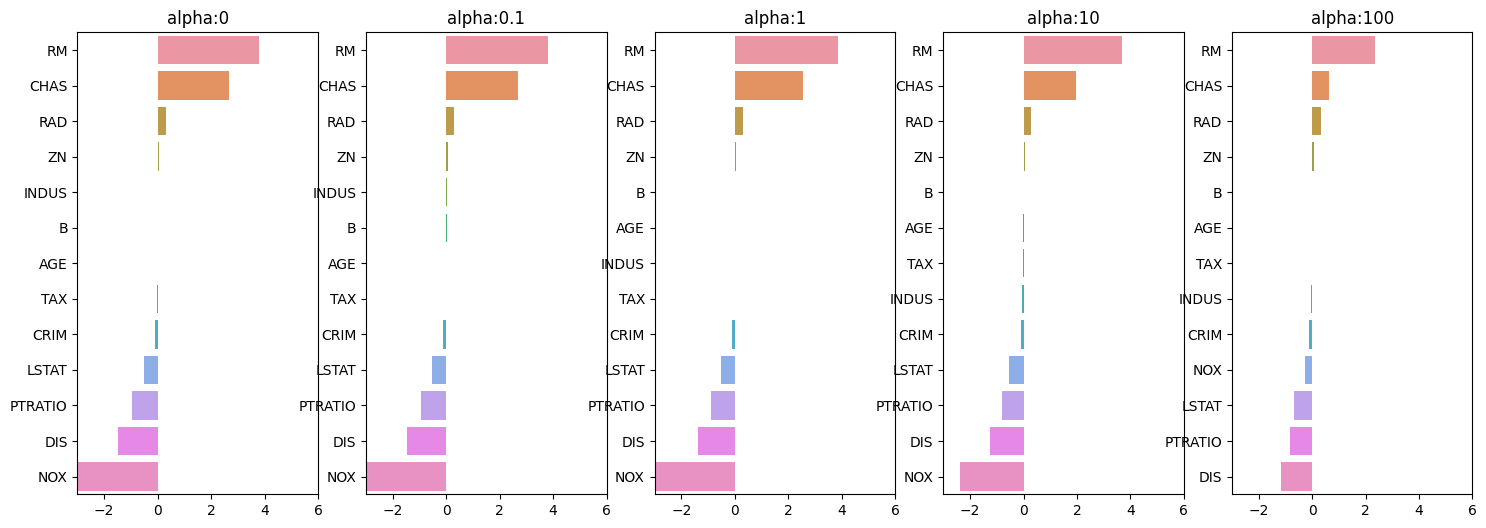

In [16]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
	ridge = Ridge(alpha = alpha)
	ridge.fit(X_data, y_target)

	coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
	colname = 'alpha:' + str(alpha)
	coeff_df[colname] = coeff

	coeff = coeff.sort_values(ascending=False)
	axs[pos].set_title(colname)
	axs[pos].set_xlim(-3, 6)
	sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
	
plt.show()

In [17]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
	ridge = Ridge(alpha = alpha)

	ridge.fit(X_train, y_train)
	pred = ridge.predict(X_test)

	rmse = np.sqrt(mean_squared_error(y_test, pred))

	print(f'alpha {alpha} 일 때 5 folds 의 평균 RMSE : {rmse:.3f}')

alpha 0 일 때 5 folds 의 평균 RMSE : 4.159
alpha 0.1 일 때 5 folds 의 평균 RMSE : 4.153
alpha 1 일 때 5 folds 의 평균 RMSE : 4.148
alpha 10 일 때 5 folds 의 평균 RMSE : 4.207
alpha 100 일 때 5 folds 의 평균 RMSE : 4.400


### sklearn.linear_model.Lasso
> class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [21]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
	lasso = Lasso(alpha = alpha)

	neg_mse_scores = cross_val_score(lasso, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
	avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
	print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.615
alpha 1 일 때 5 folds 의 평균 RMSE : 5.776
alpha 10 일 때 5 folds 의 평균 RMSE : 6.586
alpha 100 일 때 5 folds 의 평균 RMSE : 8.393


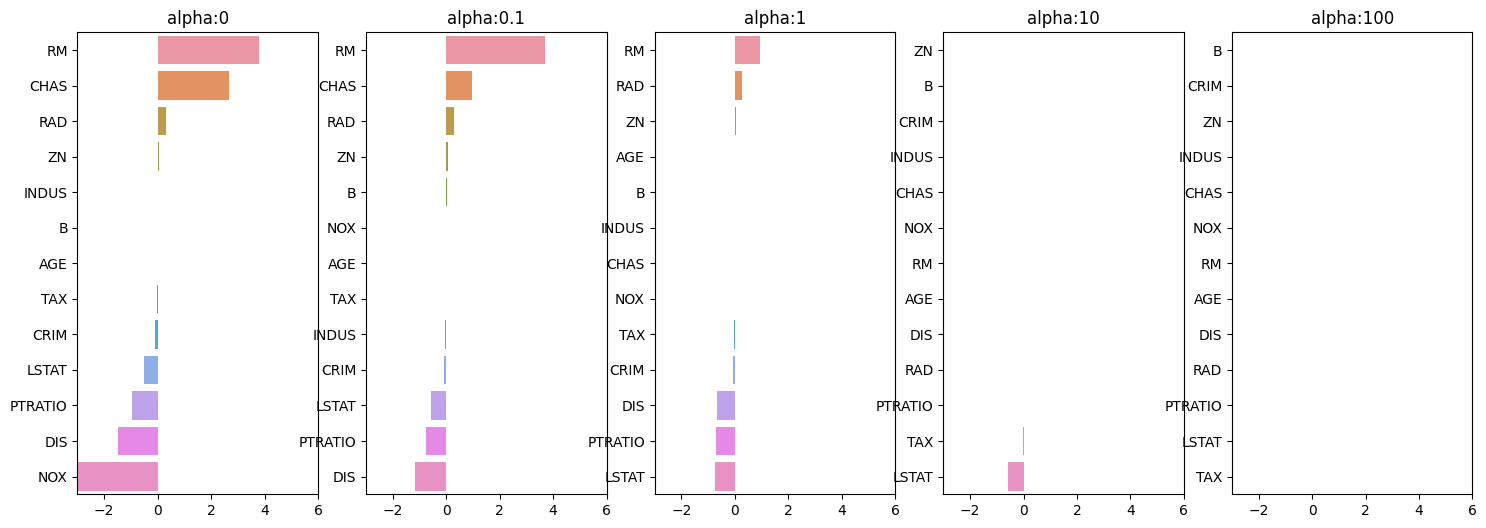

In [22]:
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
	lasso = Lasso(alpha = alpha)
	lasso.fit(X_data, y_target)

	coeff = pd.Series(data=lasso.coef_, index=X_data.columns)
	colname = 'alpha:' + str(alpha)
	coeff_df[colname] = coeff

	coeff = coeff.sort_values(ascending=False)
	axs[pos].set_title(colname)
	axs[pos].set_xlim(-3, 6)
	sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
	
plt.show()

### sklearn.linear_model.ElasticNet
> class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')

In [23]:
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
	coeff_df = pd.DataFrame()
	if verbose : print('######', model_name, '######')
	for param in params:
		if model_name == "Ridge": model = Ridge(alpha=param)
		elif model_name == 'Lasso': model = Lasso(alpha=param)
		elif model_name == 'ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
		neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring='neg_mean_squared_error', cv=5)
		avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
		print(f'alpha {param}일 때 5 폴드 세트의 평균 RMSE: {avg_rmse:.3f}')

		model.fit(X_data, y_target)
		coeff = pd.Series(data=model.coef_, index=X_data.columns)
		colname = 'alpha:' + str(param)
		coeff_df[colname] = coeff
	return coeff_df

In [24]:
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

###### Lasso ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189


In [28]:
sort_column = 'alpha:' + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


In [27]:
ridge_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_ridge_df = get_linear_reg_eval('Ridge', params=ridge_alphas, X_data_n=X_data, y_target_n=y_target)

###### Ridge ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.799
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.700
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653
alpha 3일 때 5 폴드 세트의 평균 RMSE: 5.589


In [29]:
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_ridge_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.815869,3.818233,3.840757,3.854000,3.847645
CHAS,2.674915,2.670019,2.612117,2.552393,2.371317
RAD,0.304241,0.303515,0.295989,0.290142,0.280973
ZN,0.046528,0.046572,0.047041,0.047443,0.048304
INDUS,0.017307,0.015999,0.002252,-0.008805,-0.028456
B,0.009352,0.009368,0.009538,0.009673,0.009908
AGE,0.000006,-0.000269,-0.003144,-0.005415,-0.009189
TAX,-0.012396,-0.012421,-0.012686,-0.012912,-0.013379
CRIM,-0.107628,-0.107474,-0.105866,-0.104595,-0.102470
LSTAT,-0.525617,-0.525966,-0.529832,-0.533343,-0.542009


In [26]:
elastic_net_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_net_df = get_linear_reg_eval('ElasticNet', params=elastic_net_alphas, X_data_n=X_data, y_target_n=y_target)

###### ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068


In [30]:
sort_column = 'alpha:' + str(elastic_net_alphas[0])
coeff_elastic_net_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000
